Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Paul Song"
COLLABORATORS = "None"

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

    1. [1,5,6,2,3,4,7,8,9]
    2. 6 (Python index, starting at 0)

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [30]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    # the last index is used as the pivot
    x = A[r]
    # starts from before the range of the array
    i = p-1
    # loop from the first index until one element before the pivot
    for j in range(p, r):
        # if an element is less than or equal to the pivot, i increments by one and i and j swaps
        if A[j] <= x:
            i += 1
            swap(A, i, j)
    # swap the pivot with the index i+1 is at
    swap(A, i+1, r)
    return i+1

# simple function to swap two elements in an array
def swap(A, i, j):
    temp = A[i]
    A[i] = A[j]
    A[j] = temp

In [31]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [37]:
def quick_sort(A,p,r):
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
A = [0]
quick_sort(0,0,0)
print(A)

[0]


In [35]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

AssertionError: 

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


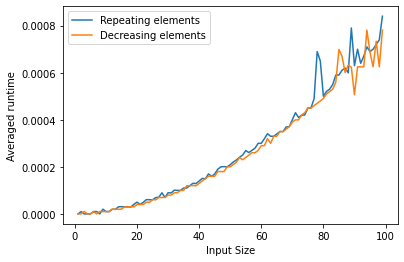

In [77]:
import time
def quick_sort_runtime(case):
    max_length = 100
    n_experiments = 100

    timer = []
    input_size = []
    for k in range(1, max_length):
        if case == "same":
            input_data = [1 for i in range(k)]
        if case == "decrease":
            input_data = [-i for i in range(k)]
        end_timer = 0
        for run in range(n_experiments):
            start_timer = time.time()
            quick_sort(input_data,0,len(input_data)-1)
            end_timer += time.time() - start_timer
        timer.append(end_timer/n_experiments)
        input_size.append(k)
    return input_size, timer



import matplotlib.pyplot as plt
plt.plot(quick_sort_runtime("same")[0], quick_sort_runtime("same")[1], label = 'Repeating elements')
plt.plot(quick_sort_runtime("decrease")[0], quick_sort_runtime("decrease")[1], label = 'Decreasing elements')
plt.xlabel('Input Size')
plt.ylabel('Averaged runtime')
plt.legend()